In [263]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [264]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 42)

# Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

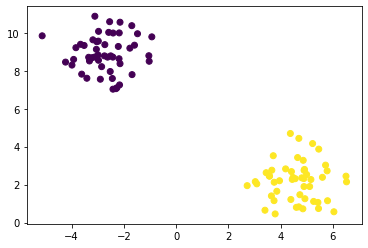

In [265]:
# Plotting the available data
plt.scatter(X[:, 0], X[:, 1], c = y)

In [266]:
class ImplementLogisticRegression:
    
    # Constructor
    def __init__(self, learning_rate = 0.01):
        self.learning_rate = learning_rate
    
    # Training the model
    def fit(self, X, y):
        
        # Creating a column of ones for multiplication of vectors
        ones = np.ones((X.shape[0], 1))
        
        # Storing x coordinates
        self.X = np.hstack([ones, X])
        
        # Storing the values of 'yi's
        self.y = y.reshape(-1, 1)
        
        # Storing the variables of theta
        self.theta = np.array(np.zeros((self.X.shape[1], 1)))
        
        # Carrying out gradient descent a fixed number of times
        for i in range(200):
            self.gradient_ascent()
    
    def predict(self, X_test, y_test):
        
        # Storing the number of correct and the total number of predictions
        correct, total = 0, 0
        predicted_classes = []
        
        # Predicting for all the points
        for x1, x2, y in zip(X_test[:, 0], X_test[:, 1], y_test[:]):
            
            # Noting that a prediction has been made
            total += 1
            
            # Obtaining the attributes of theta
            theta = self.theta
            theta_0 = theta[0]
            theta_1 = theta[1]
            theta_2 = theta[2]
            
            # Computing the expression by substituting the values in the equation
            val = theta_0 + theta_1 * x1 + theta_2 * x2
            
            # Predicting the class to which the point belongs to
            if(val >= 0):
                predicted_classes.append(1)
                val = 1
            else:
                predicted_classes.append(0)
                val = 0
            
            # Noting for a correct prediction
            if val == y:
                correct += 1
        # Returning the set of predictions and the percentage accuracy
        return np.array(predicted_classes), correct / total * 100
    
    # Returns the outputs from the hypothesis
    def get_hypothesis(self):
        dot_product = np.dot(self.X, self.theta)
        
        # Calculating the outputs from the hypothesis for all the values of X
        hypothesis = 1 / (1 + np.exp(-dot_product))
        return hypothesis
    
    # Performing the gradient descent
    def gradient_ascent(self):
        
        # Getting the hypothesis output for all the values of X
        hypothesis = self.get_hypothesis()
        
        # Calculating the sigma term in the gradient ascent formula
        sigma = np.dot(self.X.T, self.y - hypothesis)
        
        # Updating the values of theta
        self.theta += self.learning_rate * sigma

In [267]:
# Creating a model for logistic regression
model = ImplementLogisticRegression()

In [268]:
# Training the model with training data
model.fit(X_train, y_train)

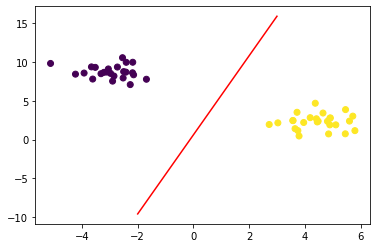

In [269]:
# Getting the attributes of the line
theta = model.theta
theta_0 = theta[0]
theta_1 = theta[1]
theta_2 = theta[2]

# Plotting the points
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)

# Plotting the line dividing the two classes
x_plot = np.linspace(-2, 3)
y_plot = -theta_1 / theta_2 * x_plot - theta_0 / theta_2
plt.plot(x_plot, y_plot, color = 'red')

In [271]:
# Obtaining the set of predictions and their accuracy
predictions, accuracy = model.predict(X_test, y_test)

In [272]:
print(accuracy)

100.0
